In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
from sqlalchemy.orm import Session
session = Session(bind=engine)
conn = engine.connect()

In [10]:
measurement_data = pd.read_sql("SELECT * FROM Measurement", conn)
measurement_data.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [11]:
station_data = pd.read_sql('SELECT * FROM Station', conn)
station_data.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
recent_date = pd.read_sql('SELECT max(date) FROM Measurement ', conn)
recent_date

,max(date)
0,2017-08-23


            prcp
date            
2016-08-23  0.00
2016-08-23  0.15
2016-08-23  0.05
2016-08-23   NaN
2016-08-23  0.02
...          ...
2017-08-22  0.50
2017-08-23  0.00
2017-08-23  0.00
2017-08-23  0.08
2017-08-23  0.45

[2230 rows x 1 columns]


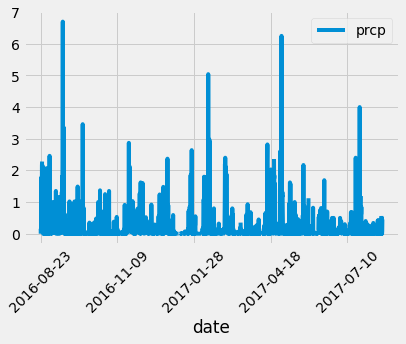

In [22]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Perform a query to retrieve the data and precipitation scores
last_12_month = pd.read_sql('SELECT date, prcp FROM Measurement WHERE date <= "2017-08-23" and date >= "2016-08-23" \
ORDER BY date asc', conn)


# Save the query results as a Pandas DataFrame and set the index to the date column
last_12_month_df = pd.DataFrame(last_12_month).set_index('date')
print(last_12_month_df)

# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data
last_12_month_df.plot(rot=45)

plt.savefig("../Image/Precipitation analysis.png")


In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
last_12_month_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [36]:
# Design a query to calculate the total number stations in the dataset
station_count = pd.read_sql('SELECT count(*) FROM Station ', conn)
station_count

,count(*)
0,9


In [44]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_station = pd.read_sql\
('SELECT *,count(*) AS count FROM Measurement GROUP BY station ORDER BY count desc', conn)
most_active_station

,id,station,date,prcp,tobs,count
0,12188,USC00519281,2010-01-01,0.15,70.0,2772
1,1,USC00519397,2010-01-01,0.08,65.0,2724
2,2725,USC00513117,2010-01-01,0.28,67.0,2709
3,9519,USC00519523,2010-01-01,0.15,75.0,2669
4,16939,USC00516128,2010-01-01,0.14,73.0,2612
5,5434,USC00514830,2010-03-01,0.01,67.0,2202
6,14960,USC00511918,2010-01-01,0.05,66.0,1979
7,7636,USC00517948,2010-05-03,NaN,75.0,1372
8,9008,USC00518838,2010-01-01,0.21,72.0,511


In [49]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
result = pd.read_sql\
('SELECT station, max(tobs) AS "highest temperature", min(tobs) AS "lowest temperature", avg(tobs) AS "average temperature" \
FROM Measurement WHERE station = "USC00519281"', conn)
result

,station,highest temperature,lowest temperature,average temperature
0,USC00519281,85.0,54.0,71.663781


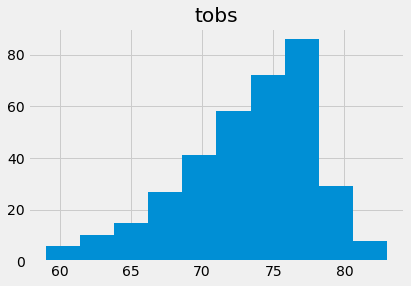

In [23]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
USC00519281_past_12_month = pd.read_sql\
('SELECT date, tobs FROM Measurement WHERE station = "USC00519281" and date <= "2017-08-23" and date >= "2016-08-23"\
ORDER BY date asc', conn)
USC00519281_past_12_month

USC00519281_past_12_month.hist()

plt.savefig("../Image/One Year Tobs Analysis.png")

# Close session

In [ ]:
# Close Session
session.close()